In [1]:
### Import necessary packages

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
### Read data We will be using pandas.read_csv function to read data file saved in form of csv(comma seperated values) format

In [4]:
df_s = pd.read_csv(r'C:\Users\aishk\Downloads\Spiral_HandPD.csv')

In [5]:
##### Overview of our dataframe: We will use DataFrame.head() which helps to get a overview on our dataset i.e by default it will show top 5 rows in our dataframe. We can change the default value by passing any number eg. df.head(NUM) where NUM it the total number of row you want to display

In [6]:
df_s.head()

,_ID_EXAM,IMAGE_NAME,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
0,68,0068-1.jpg,1,1,F,L,28,2446.759108,5388.771096,33435.39545,0.0,26.849731,183.854351,0.017068,1779.550502,0.216138
1,68,0068-2.jpg,1,1,F,L,28,2159.220559,4617.939790,34428.29401,0.0,26.758489,186.609895,0.000000,1885.340368,0.184438
2,68,0068-3.jpg,1,1,F,L,28,1740.390711,4260.973134,33632.95400,0.0,30.973944,183.868389,0.006510,2197.159165,0.181287
3,68,0068-4.jpg,1,1,F,L,28,2047.900847,4286.241318,32412.94476,0.0,28.165933,186.055214,0.025942,1875.711604,0.193084
4,92,0092-1.jpg,2,1,M,R,37,2059.220895,4733.016802,35437.08102,0.0,22.091342,186.092103,0.000000,1625.325851,0.193642


In [7]:
##### Summary of our dataframe: To have a good grasp on our data we will take a look at column names to refer them further, total non-null count in that column and the data-type of respective columns we will use DataFrame.info() function as show below

In [8]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   _ID_EXAM                                         368 non-null    int64  
 1   IMAGE_NAME                                       368 non-null    object 
 2   ID_PATIENT                                       368 non-null    int64  
 3   CLASS_TYPE                                       368 non-null    int64  
 4   GENDER                                           368 non-null    object 
 5   RIGH/LEFT-HANDED                                 368 non-null    object 
 6   AGE                                              368 non-null    int64  
 7   RMS                                              368 non-null    float64
 8   MAX_BETWEEN_ET_HT                                368 non-null    float64
 9   MIN_BETWEEN_ET_HT               

In [9]:
### Statistic on our data We can have a brief analysis on our dataframe using DataFrame.describe function. Let me elaborate the output w.r.t each columns:
##count: total no. of data entries
##mean: mean of all the values (does not work for character/string columns)
##std: standard deviation i.e dispersion from mean
##min: smallest value
##25%: 25% of all your values are below that value
##50%: 50% of all your values are below that value (this is also the median of the column)
##75%: 75% of all your values are below that value
##(for 100 data entries in a columsn 25%, 50% and 75% will give 25th, 50th and 75th value)
##max: largest value

In [10]:
df_s.describe()

,_ID_EXAM,ID_PATIENT,CLASS_TYPE,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,160.315217,16.948370,1.804348,55.630435,2270.185566,4655.817222,31814.991755,0.356294,24.857421,179.174107,0.012933,1652.280165,0.190768
std,87.641694,10.913334,0.397242,11.744526,595.123226,823.967869,3714.426450,3.362279,2.904579,5.655707,0.015614,218.212572,0.034487
min,2.000000,1.000000,1.000000,19.000000,1149.453428,3026.734118,12021.729690,0.000000,17.520778,162.410537,0.000000,1110.767518,0.080925
25%,99.500000,7.750000,2.000000,52.000000,1857.323506,4104.916256,30318.196730,0.000000,22.965599,175.298802,0.000000,1485.222378,0.168483
50%,175.000000,16.000000,2.000000,57.000000,2137.835429,4534.277453,31910.524955,0.000000,24.550035,179.521660,0.008539,1641.108043,0.190616
75%,231.000000,26.250000,2.000000,63.000000,2515.601624,5064.162306,33683.125508,0.006597,26.459068,183.218993,0.019617,1809.679931,0.210413
max,305.000000,37.000000,2.000000,79.000000,5094.404297,7480.764160,47688.289020,61.262583,35.752336,203.759111,0.113909,2280.436125,0.309249


In [11]:
##### Verify if our dataset has any null values
##DataFrame.isna() returns a DataFrame with boolean values i.e if value is null return False else return True
##Applying .sum() on the method above will sum the total count of true values for that column
##(First execute DataFrame.isna() to check how an boolean dataframe looks like)

In [12]:
df_s.isna().sum()

_ID_EXAM                                           0
IMAGE_NAME                                         0
ID_PATIENT                                         0
CLASS_TYPE                                         0
GENDER                                             0
RIGH/LEFT-HANDED                                   0
AGE                                                0
RMS                                                0
MAX_BETWEEN_ET_HT                                  0
MIN_BETWEEN_ET_HT                                  0
STD_DEVIATION_ET_HT                                0
MRT                                                0
MAX_HT                                             0
MIN_HT                                             0
STD_HT                                             0
CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT    0
dtype: int64

In [13]:
### Undestanding correlation using Heatmap visulisation .
#### What is correlation ?
##    Checking correlations is an important part of the exploratory data analysis process </br>
##    Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables (so, higher the correlation value higher is the dependecy of variables on each other)
##    Positive correlation is a relationship between two variables in which both variables move in the same direction. This is when one variable increases while the other increases and visa versa.
##Where as negative correlation is a relationship where one variable increases as the other decreases, and vice versa.
##    Function to create 2d correlation matrix DataFrame.corr()
#### What is a Heatmap ?
##    A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color represent varuable in values.
##    A simple way to plot a heatmap in Python is by importing and implementing the Seaborn library
##Function to draw a heatmap Seaborn.heatmap()
##Important paramteres of heatmap function
##  data: a 2d array
##  annot: if True, writes the data value in each cell

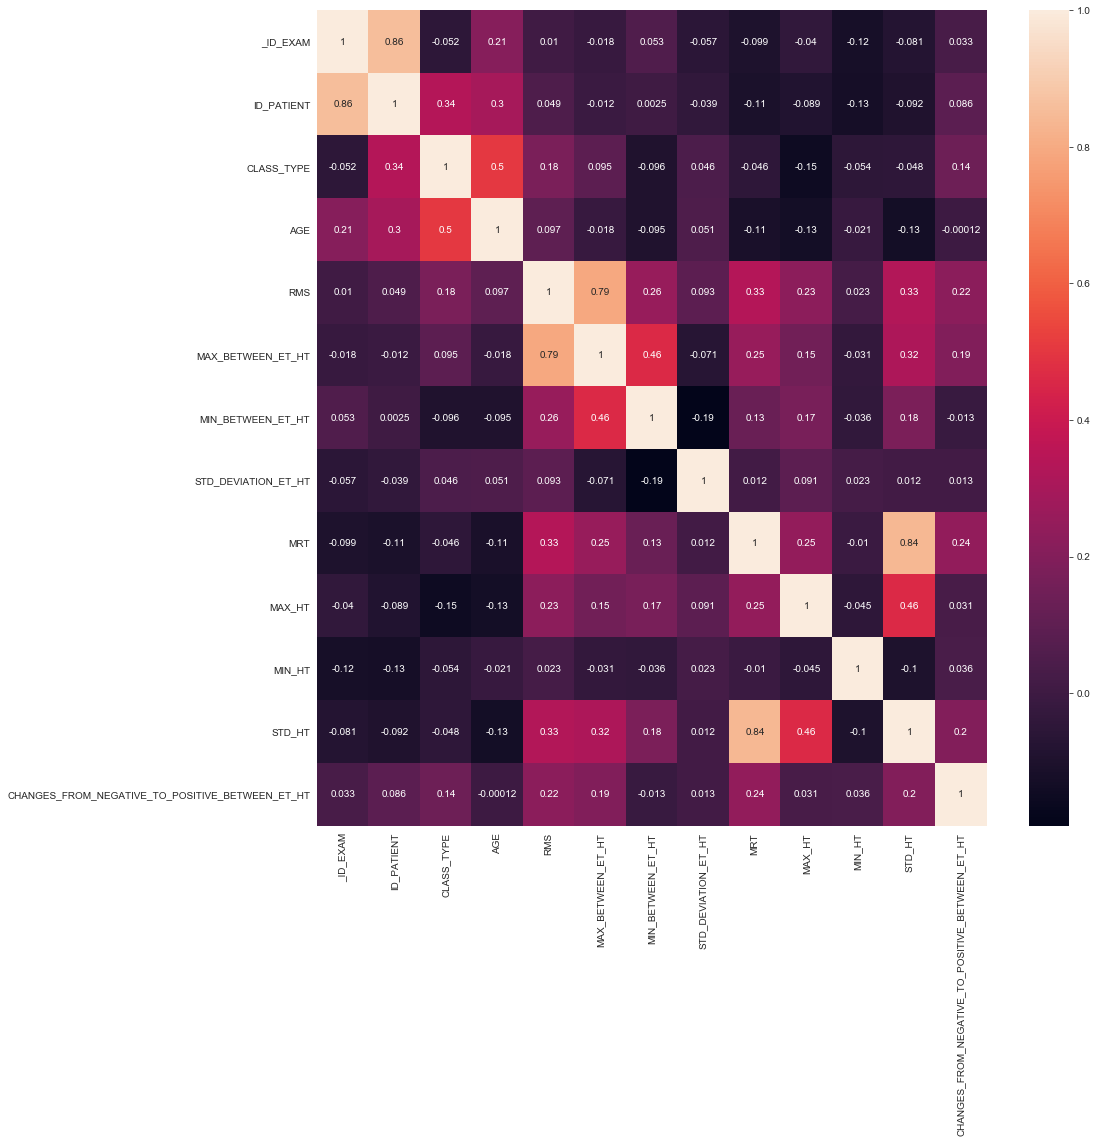

In [14]:
corr_map=df_s.corr()
sns.set_style('darkgrid') 
# sns.set_style help to set color of the axes, whether a grid is enabled by default, and other aesthetic elements.
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_map, annot=True)

In [15]:
### Correlation of target label status with each feature
##df.corr()['CLASS_TYPE'] will return the correlation values status column
##correlation_values.abs().sort_values(ascending=False) this will covert the correlation values to positive and then sort them in descending order
##(This will help us sort correlation values)

In [16]:
correlation_values=df_s.corr()['CLASS_TYPE']
correlation_values.abs().sort_values(ascending=False)

CLASS_TYPE                                         1.000000
AGE                                                0.503088
ID_PATIENT                                         0.337066
RMS                                                0.176411
MAX_HT                                             0.152115
CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT    0.138796
MIN_BETWEEN_ET_HT                                  0.095861
MAX_BETWEEN_ET_HT                                  0.094716
MIN_HT                                             0.053629
_ID_EXAM                                           0.051757
STD_HT                                             0.047784
STD_DEVIATION_ET_HT                                0.046285
MRT                                                0.045640
Name: CLASS_TYPE, dtype: float64

In [17]:
### Extract features and taget label into two different dataframes
##df.loc[:,df.columns!='CLASS_TYPE'] : extract all columns except label CLASS_TYPE
##df.loc[:,'CLASS_TYPE'] : extract taget column named CLASS_TYPE

In [18]:
features=df_s.loc[:,df_s.columns!='CLASS_TYPE']
labels=df_s.loc[:,'CLASS_TYPE']

In [19]:
features = features.drop(['_ID_EXAM', 'IMAGE_NAME','ID_PATIENT','GENDER','RIGH/LEFT-HANDED','AGE'], axis=1)

In [20]:
###### Analyse count of people affected as well as not affected with Parkinson disease
##labels[labels==1].shape : returns total number of rows with target lable 1 (Not having parkinson disease)
##labels[labels==2].shape : returns total number of rows with target label 2 (Having parkinson disease)

In [21]:
print(" Examples with label '1': {}\n Examples with label '2': {}".format(labels[labels==1].shape, labels[labels==2].shape))

 Examples with label '1': (72,)
 Examples with label '2': (296,)


In [22]:
#### Preprocessing our data with MinMax Scaler
##MinMaxScaler() transforms features by scaling each feature to a given range.
##This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between (-1,1).
##So, we will first initialise our MinMaxSacler

In [23]:
mm_scaler = MinMaxScaler(feature_range=(-1,1))

In [24]:
#### Fit and Transform using MinMax Scaler
##what fit_transform does is that performs the necessary calculation first and then do transformation on that data
##The basic formula for Min-Max scaling is how below:
## Xnew = (X_i  – min(X))/(max(X) – min(X)) 
    


In [25]:
X = mm_scaler.fit_transform(features) 
y = labels.values

In [26]:
### Train Test Split
#The train_test_split function is for splitting a single dataset for two different purposes: training and testing. The testing subset is for building your model.
#The testing subset is for using the model on unknown data to evaluate the performance of the model
#Some important paramaters of train_test_split() are as follows:
#X, y: The first parameter is the dataset you're selecting to use.
#test_size: This parameter specifies the size of the testing dataset.
#random_state: To save the state of train_test_split so that the radnom split generated is same every time.
#We have distrbuted our data as follows:
#train data: 70% of total data
#test_data: 30% of total data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [28]:
# ### We will be using XGBoost Classifier

#Some important parameters of XGBoost Classifier are as follows :

# booster [default=gbtree]
# Select the type of model to run at each iteration. It has 2 options:
# gbtree: tree-based models
# gblinear: linear models
# silent [default=0]:

# Silent mode is activated is set to 1, i.e. no running messages will be printed.
# It’s generally good to keep it 0 as the messages might help in understanding the model.
# eta [default=0.3]

# Analogous to learning rate in GBM
# Makes the model more robust by shrinking the weights on each step
# Typical final values to be used: 0.01-0.2
# min_child_weight [default=1]

# Defines the minimum sum of weights of all observations required in a child.
# This is similar to min_child_leaf in GBM but not exactly. This refers to min “sum of weights” of observations while GBM has min “number of observations”.
# Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
# Too high values can lead to under-fitting hence, it should be tuned using CV.
# max_depth [default=6]
# The maximum depth of a tree, same as GBM.
# Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
# Should be tuned using CV.
# Typical values: 3-10
# max_leaf_nodes
# The maximum number of terminal nodes or leaves in a tree.
# Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
# If this is defined, GBM will ignore max_depth. gamma [default=0]
# A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
# Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.

# subsample [default=1]
# Same as the subsample of GBM. Denotes the fraction of observations to be randomly samples for each tree.
# Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.
# Typical values: 0.5-1
# lambda [default=1]
# L2 regularization term on weights (analogous to Ridge regression)
# This used to handle the regularization part of XGBoost. Though many data scientists don’t use it often, it should be explored to reduce overfitting.
# alpha [default=0]
# L1 regularization term on weight (analogous to Lasso regression) Can be used in case of very high dimensionality so that the algorithm runs faster when implemented
# scale_pos_weight [default=1]
# A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.


# I have not provided any parameter to the XGBosot Classifier Model , I will be using the default values but you can try different values
# We will initialize a XGBClassier model
# Train and fit our train data on the classfier with method :
# xbg_model.fit(X_train, y_train)


In [29]:
xbg_model = XGBClassifier()
xbg_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
# #### Prediction on test data
# Predict with test data using:
# xbg_model.predict(X_test)

In [31]:
y_pred = xbg_model.predict(X_test)

In [32]:
# ### Performance of our classification model using confusion matix
# In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix are highly dependable output matrix.
# A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known
# Its give summary of prediction results on a classification problem.
# The number of correct and incorrect predictions are summarized with count values and broken down by each class.
# This is the key to the confusion matrix.
# The confusion matrix shows the ways in which your classification model is confused when it makes predictions.
# It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.


In [33]:
print(confusion_matrix(y_test, y_pred))

[[ 7 16]
 [ 3 85]]


In [34]:

# #### From our confusion matrix we can conclude that we have predicted about 19 wrong predictions:
# 16 are False Negatives
# 3 are False Positves
# That mean our model has classified 16 patients as negative even when they were positive and 3 patient as positive even if he was negative
# In Medical diagnosis we can deal with False Positives but we cannot use the results directly from a model that has higher number of False Negative at any cost
# So, what we do is tune(improve) our model and always try reduce False Negative as much as possible which untimately increases the model accuarcy
# ### Our classification model accuracy score
# The most common metric for classification is accuracy, which is the fraction of samples predicted correctly
# Accuracy is the ratio of Total No. Correct prediction and Total No. of Predictions
### Sklearn's confusion matrix can be used as follow: confusion_matrix(y_true, y_pred)

In [35]:
print(accuracy_score(y_test, y_pred))

0.8288288288288288
